In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
input_dir = "E:\\second review\\Featured data\\FeatureData.csv"
HNN_ACC   ="E:\\second review\\ACC\\HNN\\"

In [3]:
len(os.listdir(HNN_ACC))

23522

In [4]:
#data_file = '/Users/manuel/seisML/raw_data/mini_downsamp_5x_all.npy'
# attr_file = '/Users/manuel/seisML/raw_data/mini_wforms_table.csv'
#Loads data and creates the data handler object
#        :param data_file: file with waveform data
#        :param attr_file: file with labels for waveform
#        :param batch_size: batch size to use
#        :param sample_rate: sampling rate for waveforms
#        :param v_names: List with conditional variable names
#        :param isel: set of indices to use
#       """

In [5]:
df1=pd.read_csv(input_dir)

df1['indexes']=df1['Unnamed: 0']

df1=df1.drop('Unnamed: 0',axis=1)

df1=df1.drop('VS30',axis=1)
df1

,Event_id,Magnitude,Distance,Depth,Lattitude,Longitude,Station Lattitude,Station Longitude,Station_Code,PGA,Site_Class,Time_pga,Low_cut_frequency,High_cut_frequency,Time_Interval,NDATA,Back_Azimuth_Degree,indexes
0,TK-1999-0415,7.2,28.1,14.8,40.8243,31.2073,40.7490,30.8890,487,298.205597,A,38.480,0.03,40.0,0.005,16000.0,252.8,0
1,TK-1999-0415,7.2,29.7,14.8,40.8243,31.2073,40.7420,30.8730,496,-1009.581238,A,19.460,0.05,40.0,0.005,5980.0,252.2,1
2,TK-1999-0415,7.2,29.0,14.8,40.8243,31.2073,40.7460,30.8790,498,380.992767,B,21.830,0.20,40.0,0.005,9000.0,252.7,2
3,INT-UT19990920_174715,7.7,153.1,33.0,23.7720,120.9820,25.0860,121.4500,A003,-100.459045,C,45.905,0.20,40.0,0.005,28000.0,18.0,3
4,INT-UT19990920_174715,7.7,157.3,33.0,23.7720,120.9820,25.1080,121.5070,A005,-79.068527,B,42.195,0.20,40.0,0.005,26800.0,19.7,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23517,EMSC-20141113_0000034,4.6,26.6,15.7,38.3972,20.4684,38.1581,20.4904,AC11,12.616449,B,38.935,0.10,30.0,0.005,29542.0,175.8,23517
23518,EMSC-20141124_0000030,NaN,22.2,13.1,38.3242,20.3482,38.1581,20.4904,AC11,-29.445086,B,38.655,0.10,50.0,0.005,27218.0,145.9,23518
23519,EMSC-20141211_0000058,4.6,24.7,27.8,38.3769,20.4401,38.1581,20.4904,AC11,-27.410091,B,40.955,0.10,30.0,0.005,30018.0,169.7,23519
23520,EMSC-20141228_0000016,NaN,160.8,11.3,39.3714,21.5013,38.1581,20.4904,AC11,-0.110797,B,59.620,0.35,20.0,0.005,31992.0,213.4,23520


In [6]:
df2=pd.DataFrame([])
df2['index']=df1['indexes']
df2['Magnitude']=df1['Magnitude']
df2['Depth']=df1['Depth']
df2['Distance']=df1['Distance']
df2['Site_Class']=df1['Site_Class']
df2['value']=df1['NDATA']
pga=df1['PGA'].values

In [7]:
df2=df2.dropna()
df2.reset_index()

,level_0,index,Magnitude,Depth,Distance,Site_Class,value
0,0,0,7.2,14.8,28.1,A,16000.0
1,1,1,7.2,14.8,29.7,A,5980.0
2,2,2,7.2,14.8,29.0,B,9000.0
3,3,3,7.7,33.0,153.1,C,28000.0
4,4,4,7.7,33.0,157.3,B,26800.0
...,...,...,...,...,...,...,...
15409,23514,23514,5.1,18.0,7.8,B,16430.0
15410,23516,23516,4.2,12.8,16.1,B,27781.0
15411,23517,23517,4.6,15.7,26.6,B,29542.0
15412,23519,23519,4.6,27.8,24.7,B,30018.0


In [8]:
index=df2['index'].values
len(index)

15414

In [9]:
def i(i):
    dic={
            'A':1,
            'B':2,
            'C':3,
            'D':4,
            'E':5,
        }
    if i not in dic.keys():
        return None
    
    return dic[i]

In [10]:
dic={
            'A':1,
            'B':2,
            'C':3,
            'D':4,
            'E':5,
        }
dic.keys()

dict_keys(['A', 'B', 'C', 'D', 'E'])

In [11]:
df1['site_cat']=df1['Site_Class'].apply(i)
df2=pd.DataFrame([])
df2['index']=df1['indexes']
df2['Magnitude']=df1['Magnitude']
df2['Depth']=df1['Depth']
df2['Distance']=df1['Distance']
df2['Site_Class']=df1['site_cat']
df2['Records']=df1['NDATA']
df2=df2.drop('index',axis=1)

In [12]:
total_inputs=df2.values
total_inputs.shape

(23522, 5)

In [13]:
df2.dropna()

,Magnitude,Depth,Distance,Site_Class,Records
0,7.2,14.8,28.1,1.0,16000.0
1,7.2,14.8,29.7,1.0,5980.0
2,7.2,14.8,29.0,2.0,9000.0
3,7.7,33.0,153.1,3.0,28000.0
4,7.7,33.0,157.3,2.0,26800.0
...,...,...,...,...,...
23514,5.1,18.0,7.8,2.0,16430.0
23516,4.2,12.8,16.1,2.0,27781.0
23517,4.6,15.7,26.6,2.0,29542.0
23519,4.6,27.8,24.7,2.0,30018.0


# Time Histories

In [14]:
event_name=[]
maxi=109998.0
len(pga)

23522

In [291]:
batchsize=2001
stopped=10006

In [292]:
import math

In [293]:
y=[]
x=[]
for i in range(stopped,len(os.listdir(HNN_ACC))):
    if i in index:
        print(i,os.listdir(HNN_ACC)[i],': ',100*(len(os.listdir(HNN_ACC)[:i])/len(os.listdir(HNN_ACC))))
        df=pd.read_table(HNN_ACC+os.listdir(HNN_ACC)[i])
        wave=df.iloc[63:].values.flatten().astype(float)/abs(pga[i])
        wave=np.append(wave,np.zeros(int(maxi-len(wave))))
        wave=np.append(math.log10(abs(pga[i])),wave)
        y.append(wave)
        x.append(total_inputs[i])
        event_name.append(df.keys()[0])
        if i%batchsize==0 and i !=0:
            stopped=i+1
            break

10006 IT.MRL.00.HNN.D.IT-2006-0137.ACC.MP.ASC :  42.53889975342233
10007 IT.MRM.00.HNN.D.EMSC-20200116_0000172.ACC.MP.ASC :  42.543151092594165
10008 IT.MRM.00.HNN.D.EMSC-20200224_0000188.ACC.MP.ASC :  42.54740243176601
10009 IT.MRM.00.HNN.D.EMSC-20200317_0000006.ACC.MP.ASC :  42.55165377093785
10012 IT.MRN.00.HNN.D.IT-2011-0020.ACC.MP.ASC :  42.564407788453366
10013 IT.MRN.00.HNN.D.IT-2011-0029.ACC.MP.ASC :  42.5686591276252
10014 IT.MRN.00.HNN.D.IT-2012-0002.ACC.MP.ASC :  42.57291046679704
10015 IT.MRN.00.HNN.D.IT-2012-0004.ACC.MP.ASC :  42.577161805968885
10016 IT.MRN.00.HNN.D.IT-2012-0006.ACC.MP.ASC :  42.581413145140715
10017 IT.MRN.00.HNN.D.IT-2012-0007.ACC.MP.ASC :  42.58566448431256
10018 IT.MRN.00.HNN.D.IT-2012-0008.ACC.MP.ASC :  42.5899158234844
10019 IT.MRN.00.HNN.D.IT-2012-0009.ACC.MP.ASC :  42.59416716265624
10020 IT.MRN.00.HNN.D.IT-2012-0010.ACC.MP.ASC :  42.59841850182808
10021 IT.MRN.00.HNN.D.IT-2012-0011.ACC.MP.ASC :  42.602669840999916
10022 IT.MRN.00.HNN.D.IT-2012-00

10146 IT.NCM.00.HNN.D.IT-1998-0054.ACC.MP.ASC :  43.134087237479804
10147 IT.NCM.00.HNN.D.IT-1998-0063.ACC.MP.ASC :  43.13833857665165
10148 IT.NCO.00.HNN.D.EMSC-20200116_0000172.ACC.MP.ASC :  43.142589915823486
10149 IT.NCO.00.HNN.D.EMSC-20200224_0000188.ACC.MP.ASC :  43.14684125499532
10150 IT.NCO.00.HNN.D.EMSC-20200317_0000006.ACC.MP.ASC :  43.15109259416716
10151 IT.NCO.00.HNN.D.INT-20220120_0000080.ACC.MP.ASC :  43.155343933339005
10153 IT.NCO.00.HNN.D.IT-2006-0059.ACC.MP.ASC :  43.16384661168268
10154 IT.NCO.00.HNN.D.IT-2006-0272.ACC.MP.ASC :  43.168097950854516
10155 IT.NCO.00.HNN.D.IT-2010-0027.ACC.MP.ASC :  43.17234929002636
10157 IT.NCR2.00.HNN.D.IT-1997-0062.ACC.MP.ASC :  43.180851968370035
10158 IT.NCR2.00.HNN.D.IT-1997-0077.ACC.MP.ASC :  43.18510330754188
10159 IT.NCR2.00.HNN.D.IT-1997-0078.ACC.MP.ASC :  43.18935464671371
10160 IT.NCR2.00.HNN.D.IT-1997-0079.ACC.MP.ASC :  43.193605985885554
10161 IT.NCR2.00.HNN.D.IT-1997-0091.ACC.MP.ASC :  43.19785732505739
10162 IT.NCR2.00

10287 IT.PBN.00.HNN.D.EMSC-20191209_0000025.ACC.MP.ASC :  43.733526060709124
10288 IT.PBN.00.HNN.D.INT-20210515_0000066.ACC.MP.ASC :  43.73777739988096
10290 IT.PBN.00.HNN.D.INT-20211029_0000170.ACC.MP.ASC :  43.74628007822464
10291 IT.PBN.00.HNN.D.INT-20220922_0000080.ACC.MP.ASC :  43.75053141739648
10296 IT.PCH.00.HNN.D.IT-1990-0003.ACC.MP.ASC :  43.771788113255674
10297 IT.PCH.00.HNN.D.IT-2011-0063.ACC.MP.ASC :  43.77603945242751
10298 IT.PDM.00.HNN.D.IT-2009-0009.ACC.MP.ASC :  43.780290791599356
10300 IT.PGG.00.HNN.D.IT-1984-0004.ACC.MP.ASC :  43.78879346994303
10301 IT.PGG.00.HNN.D.IT-2009-0199.ACC.MP.ASC :  43.793044809114875
10302 IT.PGG.00.HNN.D.IT-2009-0262.ACC.MP.ASC :  43.79729614828671
10303 IT.PGG.00.HNN.D.IT-2009-0264.ACC.MP.ASC :  43.80154748745855
10304 IT.PGG.00.HNN.D.IT-2009-0279.ACC.MP.ASC :  43.80579882663039
10305 IT.PGG.00.HNN.D.IT-2009-0283.ACC.MP.ASC :  43.81005016580223
10306 IT.PGG.00.HNN.D.IT-2009-0303.ACC.MP.ASC :  43.81430150497407
10307 IT.PGG.00.HNN.D.IT-

10443 IT.PTL.00.HNN.D.IT-1997-0006.ACC.MP.ASC :  44.396734971516025
10444 IT.PTL.00.HNN.D.IT-2010-0033.ACC.MP.ASC :  44.40098631068787
10445 IT.PTT.00.HNN.D.IT-1999-0012.ACC.MP.ASC :  44.40523764985971
10446 IT.PTT.00.HNN.D.IT-2002-0024.ACC.MP.ASC :  44.409488989031544
10447 IT.PTT.00.HNN.D.IT-2005-0161.ACC.MP.ASC :  44.41374032820338
10448 IT.PTT.00.HNN.D.IT-2006-0059.ACC.MP.ASC :  44.417991667375226
10449 IT.PTT.00.HNN.D.IT-2006-0302.ACC.MP.ASC :  44.42224300654706
10450 IT.PTT.00.HNN.D.IT-2007-0155.ACC.MP.ASC :  44.4264943457189
10451 IT.PTT.00.HNN.D.IT-2009-0317.ACC.MP.ASC :  44.43074568489074
10453 IT.PTT.00.HNN.D.IT-2009-0328.ACC.MP.ASC :  44.43924836323442
10454 IT.PTT.00.HNN.D.IT-2010-0032.ACC.MP.ASC :  44.44349970240626
10455 IT.PTT.00.HNN.D.IT-2011-0061.ACC.MP.ASC :  44.4477510415781
10456 IT.PTT.00.HNN.D.IT-2011-0097.ACC.MP.ASC :  44.45200238074994
10457 IT.PTT.00.HNN.D.IT-2011-0103.ACC.MP.ASC :  44.456253719921776
10458 IT.PTT.00.HNN.D.IT-2011-0110.ACC.MP.ASC :  44.46050505

10585 IT.RST.00.HNN.D.IT-2012-0008.ACC.MP.ASC :  45.00042513391718
10586 IT.RST.00.HNN.D.IT-2012-0010.ACC.MP.ASC :  45.00467647308902
10587 IT.RST.00.HNN.D.IT-2012-0011.ACC.MP.ASC :  45.008927812260865
10588 IT.RTI.00.HNN.D.INT-20220922_0000080.ACC.MP.ASC :  45.0131791514327
10589 IT.RTI.00.HNN.D.IT-1997-0004.ACC.MP.ASC :  45.017430490604546
10590 IT.RTI.00.HNN.D.IT-1997-0006.ACC.MP.ASC :  45.02168182977638
10591 IT.RTI.00.HNN.D.IT-1997-0078.ACC.MP.ASC :  45.02593316894822
10592 IT.RTI.00.HNN.D.IT-1997-0091.ACC.MP.ASC :  45.03018450812006
10593 IT.RTI.00.HNN.D.IT-1997-0128.ACC.MP.ASC :  45.034435847291896
10594 IT.RTI.00.HNN.D.IT-1997-0137.ACC.MP.ASC :  45.03868718646374
10595 IT.RTI.00.HNN.D.IT-2010-0033.ACC.MP.ASC :  45.04293852563557
10597 IT.RVR.00.HNN.D.IT-2012-0004.ACC.MP.ASC :  45.05144120397925
10598 IT.RVR.00.HNN.D.IT-2012-0008.ACC.MP.ASC :  45.055692543151096
10599 IT.RVR.00.HNN.D.IT-2012-0010.ACC.MP.ASC :  45.05994388232293
10600 IT.RVR.00.HNN.D.IT-2012-0011.ACC.MP.ASC :  45

10725 IT.SELW.00.HNN.D.IT-1998-0028.ACC.MP.ASC :  45.59561261797466
10726 IT.SELW.00.HNN.D.IT-1998-0050.ACC.MP.ASC :  45.5998639571465
10727 IT.SELW.00.HNN.D.IT-1998-0054.ACC.MP.ASC :  45.60411529631834
10728 IT.SELW.00.HNN.D.IT-1998-0063.ACC.MP.ASC :  45.60836663549018
10729 IT.SEM.00.HNN.D.IT-1999-0028.ACC.MP.ASC :  45.612617974662015
10730 IT.SEM.00.HNN.D.IT-2012-0008.ACC.MP.ASC :  45.61686931383386
10732 IT.SEP.00.HNN.D.IT-2002-0075.ACC.MP.ASC :  45.62537199217754
10734 IT.SEP.00.HNN.D.IT-2003-0031.ACC.MP.ASC :  45.633874670521216
10735 IT.SEP.00.HNN.D.IT-2006-0137.ACC.MP.ASC :  45.63812600969305
10736 IT.SER.00.HNN.D.IT-1997-0137.ACC.MP.ASC :  45.64237734886489
10737 IT.SER.00.HNN.D.IT-1998-0028.ACC.MP.ASC :  45.646628688036735
10738 IT.SGIUA.00.HNN.D.IT-2002-0075.ACC.MP.ASC :  45.650880027208565
10740 IT.SGIUB.00.HNN.D.IT-2002-0075.ACC.MP.ASC :  45.65938270555225
10742 IT.SGMA.00.HNN.D.EMSC-20141224_0000053.ACC.MP.ASC :  45.66788538389593
10743 IT.SGMA.00.HNN.D.EMSC-20150228_0000

10885 IT.SNS.00.HNN.D.IT-2009-0323.ACC.MP.ASC :  46.27582688546892
10886 IT.SNS.00.HNN.D.IT-2010-0021.ACC.MP.ASC :  46.28007822464076
10887 IT.SNS.00.HNN.D.IT-2012-0008.ACC.MP.ASC :  46.2843295638126
10888 IT.SNS.00.HNN.D.IT-2012-0011.ACC.MP.ASC :  46.288580902984435
10889 IT.SNZ.00.HNN.D.EMSC-20200224_0000188.ACC.MP.ASC :  46.29283224215628
10890 IT.SNZ.00.HNN.D.EMSC-20200317_0000006.ACC.MP.ASC :  46.29708358132812
10892 IT.SNZ1.00.HNN.D.IT-2011-0020.ACC.MP.ASC :  46.3055862596718
10893 IT.SNZ1.00.HNN.D.IT-2012-0002.ACC.MP.ASC :  46.309837598843636
10894 IT.SNZ1.00.HNN.D.IT-2012-0006.ACC.MP.ASC :  46.31408893801547
10895 IT.SNZ1.00.HNN.D.IT-2012-0008.ACC.MP.ASC :  46.31834027718732
10896 IT.SNZ1.00.HNN.D.IT-2012-0009.ACC.MP.ASC :  46.322591616359155
10897 IT.SNZ1.00.HNN.D.IT-2012-0010.ACC.MP.ASC :  46.32684295553099
10898 IT.SNZ1.00.HNN.D.IT-2012-0011.ACC.MP.ASC :  46.33109429470283
10899 IT.SNZ1.00.HNN.D.IT-2012-0012.ACC.MP.ASC :  46.33534563387467
10900 IT.SPA.00.HNN.D.EMSC-20200224

11024 IT.STN.00.HNN.D.IT-2009-0009.ACC.MP.ASC :  46.86676303035456
11025 IT.STR.00.HNN.D.IT-1980-0012.ACC.MP.ASC :  46.8710143695264
11027 IT.STR.00.HNN.D.IT-1980-0019.ACC.MP.ASC :  46.87951704787008
11028 IT.STR.00.HNN.D.IT-1996-0001.ACC.MP.ASC :  46.88376838704192
11029 IT.STS.00.HNN.D.IT-2003-0004.ACC.MP.ASC :  46.888019726213756
11031 IT.STS.00.HNN.D.IT-2011-0065.ACC.MP.ASC :  46.89652240455743
11032 IT.STS.00.HNN.D.IT-2011-0066.ACC.MP.ASC :  46.900773743729275
11033 IT.STS.00.HNN.D.IT-2012-0008.ACC.MP.ASC :  46.90502508290111
11034 IT.STS.00.HNN.D.IT-2012-0011.ACC.MP.ASC :  46.909276422072956
11035 IT.SUS.00.HNN.D.IT-2011-0022.ACC.MP.ASC :  46.913527761244794
11036 IT.SVN.00.HNN.D.EMSC-20200317_0000006.ACC.MP.ASC :  46.91777910041663
11037 IT.SVN.00.HNN.D.EMSC-20201222_0000154.ACC.MP.ASC :  46.92203043958847
11039 IT.SVN.00.HNN.D.INT-20211223_0000236.ACC.MP.ASC :  46.93053311793215
11040 IT.SVN.00.HNN.D.INT-20220415_0000016.ACC.MP.ASC :  46.93478445710399
11041 IT.SVN.00.HNN.D.INT

11169 IT.VALS.00.HNN.D.EMSC-20200717_0000010.ACC.MP.ASC :  47.48320721027123
11170 IT.VALS.00.HNN.D.EMSC-20201229_0000132.ACC.MP.ASC :  47.487458549443076
11171 IT.VAV.00.HNN.D.EMSC-20200717_0000010.ACC.MP.ASC :  47.49170988861491
11172 IT.VAV.00.HNN.D.EMSC-20201229_0000132.ACC.MP.ASC :  47.49596122778675
11174 IT.VBM.00.HNN.D.EMSC-20200116_0000172.ACC.MP.ASC :  47.504463906130425
11175 IT.VBM.00.HNN.D.EMSC-20200224_0000188.ACC.MP.ASC :  47.50871524530227
11176 IT.VBM.00.HNN.D.EMSC-20200317_0000006.ACC.MP.ASC :  47.51296658447411
11177 IT.VBM.00.HNN.D.INT-20220120_0000080.ACC.MP.ASC :  47.51721792364595
11179 IT.VBM.00.HNN.D.IT-2006-0059.ACC.MP.ASC :  47.52572060198963
11180 IT.VBM.00.HNN.D.IT-2006-0272.ACC.MP.ASC :  47.52997194116146
11181 IT.VBM.00.HNN.D.IT-2010-0027.ACC.MP.ASC :  47.53422328033331
11182 IT.VBM.00.HNN.D.IT-2010-0047.ACC.MP.ASC :  47.538474619505145
11183 IT.VBV.00.HNN.D.EMSC-20200224_0000188.ACC.MP.ASC :  47.54272595867698
11184 IT.VBV.00.HNN.D.EMSC-20200317_0000006.

11314 IV.APEC..HNN.D.EMSC-20180816_0000090.ACC.MP.ASC :  48.09965139018791
11315 IV.APEC..HNN.D.EMSC-20181118_0000061.ACC.MP.ASC :  48.103902729359746
11316 IV.APEC..HNN.D.EMSC-20190114_0000144.ACC.MP.ASC :  48.10815406853159
11317 IV.APEC..HNN.D.EMSC-20190901_0000002.ACC.MP.ASC :  48.11240540770343
11318 IV.APEC..HNN.D.INT-20210515_0000066.ACC.MP.ASC :  48.116656746875265
11319 IV.APRC..HNN.D.EMSC-20161026_0000095.ACC.MP.ASC :  48.1209080860471
11320 IV.APRC..HNN.D.EMSC-20161030_0000029.ACC.MP.ASC :  48.125159425218946
11321 IV.APRC..HNN.D.EMSC-20170118_0000027.ACC.MP.ASC :  48.129410764390784
11322 IV.APRC..HNN.D.EMSC-20180425_0000042.ACC.MP.ASC :  48.13366210356263
11323 IV.APRC..HNN.D.EMSC-20180814_0000101.ACC.MP.ASC :  48.13791344273446
11324 IV.APRC..HNN.D.EMSC-20210327_0000078.ACC.MP.ASC :  48.1421647819063
11326 IV.ARCI..HNN.D.EMSC-20190901_0000002.ACC.MP.ASC :  48.15066746024998
11327 IV.ARCI..HNN.D.EMSC-20191209_0000025.ACC.MP.ASC :  48.15491879942182
11328 IV.ARCI..HNN.D.INT

KeyboardInterrupt: 

In [23]:
i

2001

# check if everything placed well

In [294]:
y=np.array(y)
x=np.array(x)

In [25]:
y

array([[ 2.47451579e+00,  0.00000000e+00, -8.92002037e-07, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 3.00414127e+00,  0.00000000e+00,  5.44606000e-04, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 2.58091673e+00,  0.00000000e+00,  1.06041383e-04, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [-8.38425383e-01,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.04081559e-01,  0.00000000e+00, -0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-8.27268667e-01,  0.00000000e+00, -6.71844347e-06, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [26]:
y.max()

3.0041412710712336

(-1.0, 1.0)

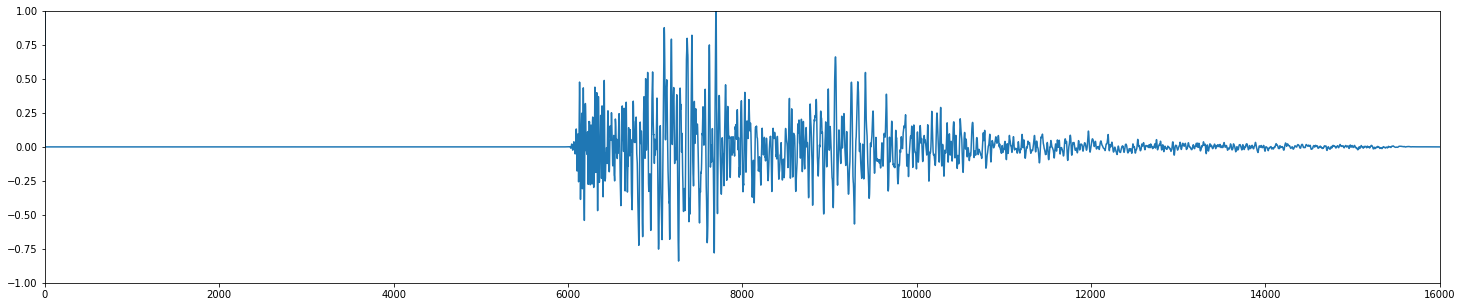

In [32]:
plt.figure(figsize=(25,5))
plt.plot(y[0])
plt.xlim(0,16000)
plt.ylim(-1,1)

# Data Preprocessing

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [12]:
S = StandardScaler()
x_test_sc = S.fit_transform(x_test)

In [35]:
y.shape

(1312, 109999)

In [295]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

# Building Network

In [37]:
from keras.layers import Input, Dense, LeakyReLU, Dropout
from keras.models import Model
from keras.optimizers import Adam

In [39]:
# Define the dimensions of the input and output arrays
x_dim = x.shape[1]
y_dim = y.shape[1]

In [40]:
x_dim

5

In [41]:
y_dim

109999

In [44]:
# Define the generator model
g_input = Input(shape=(x_dim,))
g_hidden = Dense(64)(g_input)
g_hidden = LeakyReLU(0.2)(g_hidden)
g_hidden = Dense(128)(g_hidden)
g_hidden = LeakyReLU(0.2)(g_hidden)
g_hidden = Dense(256)(g_hidden)
g_hidden = LeakyReLU(0.2)(g_hidden)
g_output = Dense(y_dim, activation='linear')(g_hidden)
generator = Model(g_input, g_output)

In [45]:
generator.compile(optimizer=Adam(), loss='mse', metrics=['accuracy'])

In [46]:
# Define the discriminator model
d_input = Input(shape=(y_dim,))
d_hidden = Dense(256)(d_input)
d_hidden = LeakyReLU(0.2)(d_hidden)
d_hidden = Dropout(0.5)(d_hidden)
d_hidden = Dense(128)(d_hidden)
d_hidden = LeakyReLU(0.2)(d_hidden)
d_hidden = Dense(32)(d_hidden)
d_hidden = LeakyReLU(0.2)(d_hidden)
d_output = Dense(1, activation='sigmoid')(d_hidden)
discriminator = Model(d_input, d_output)

In [47]:
# Compile the discriminator
discriminator.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

In [48]:
# Freeze the weights of the discriminator to use in the combined model
discriminator.trainable = False

In [49]:
# Define the combined model
gan_input = Input(shape=(x_dim,))
gan_output = discriminator(generator(gan_input))
gan = Model(gan_input, gan_output)

In [50]:
# Compile the combined model
gan.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

In [51]:
# Generate some random noise as input for the generator
random_noise = np.random.rand(x.shape[0], x_dim)

# Pre-train the generator
g_loss = generator.fit(random_noise, y, epochs=10, batch_size=20)

# Train the GAN
for epoch in range(10):
    # Generate some fake data
    fake_y = generator.predict(random_noise)

    # Concatenate the fake data with the real data
    real_data = np.concatenate((y, fake_y))

    # Create labels for the fake and real data
    labels = np.concatenate((np.ones(y.shape[0]), np.zeros(fake_y.shape[0])))

    # Train the discriminator on the real and fake data
    d_loss = discriminator.train_on_batch(real_data, labels)

    # Generate some more random noise
    random_noise = np.random.rand(x.shape[0], x_dim)

    # Train the generator through the GAN model
    gan_loss = gan.train_on_batch(random_noise, np.ones(x.shape[0]))

    # Print the loss values
    print("epoch: %d, discriminator loss: %f, generator loss: %f, gan loss: %f" % (epoch+1, d_loss[0], g_loss.history['loss'][0], gan_loss[0]))


Epoch 1/10
66/66 [==============================] - 11s 144ms/step - loss: 0.0037 - accuracy: 0.4596
Epoch 2/10
66/66 [==============================] - 9s 141ms/step - loss: 0.0037 - accuracy: 0.5061
Epoch 3/10
66/66 [==============================] - 9s 142ms/step - loss: 0.0037 - accuracy: 0.5061
Epoch 4/10
66/66 [==============================] - 9s 139ms/step - loss: 0.0037 - accuracy: 0.5061
Epoch 5/10
66/66 [==============================] - 9s 143ms/step - loss: 0.0037 - accuracy: 0.5061
Epoch 6/10
66/66 [==============================] - 9s 141ms/step - loss: 0.0037 - accuracy: 0.5061
Epoch 7/10
66/66 [==============================] - 9s 142ms/step - loss: 0.0037 - accuracy: 0.5061
Epoch 8/10
66/66 [==============================] - 9s 142ms/step - loss: 0.0037 - accuracy: 0.5061
Epoch 9/10
66/66 [==============================] - 9s 143ms/step - loss: 0.0037 - accuracy: 0.5061
Epoch 10/10
41/41 [==============================] - 1s 12ms/step
epoch: 1, discriminator loss: 0.6

In [52]:
g_loss.history

{'loss': [0.0036828427109867334,
  0.0036794652696698904,
  0.0036785409320145845,
  0.0036772715393453836,
  0.0036757858470082283,
  0.003673515748232603,
  0.0036709392443299294,
  0.0036679203622043133,
  0.00366529100574553,
  0.0036620134487748146],
 'accuracy': [0.4596036672592163,
  0.5060975551605225,
  0.5060975551605225,
  0.5060975551605225,
  0.5060975551605225,
  0.5060975551605225,
  0.5060975551605225,
  0.5060975551605225,
  0.5060975551605225,
  0.5060975551605225]}

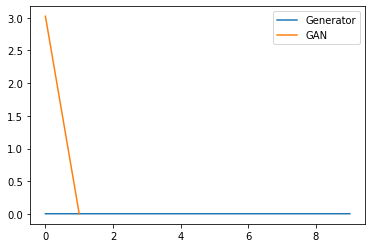

In [53]:

plt.plot(g_loss.history['loss'], label='Generator')
plt.plot(gan_loss, label='GAN')
plt.legend()
plt.show()

In [55]:
generator.save('generator2.h5')

In [19]:
from tensorflow.keras.models import load_model

# Load the generator
generator = load_model('generator.h5')

In [65]:
y_pred = generator.predict(x_test1)

5/5 [==============================] - 0s 9ms/step


In [66]:
y_pred[0]

array([ 2.1475100e+01, -1.2246647e-03,  4.3529825e-04, ...,
        2.7004530e-04, -1.4519325e-03,  3.4078289e-04], dtype=float32)

In [67]:
y_pred[10][0]

26.881453

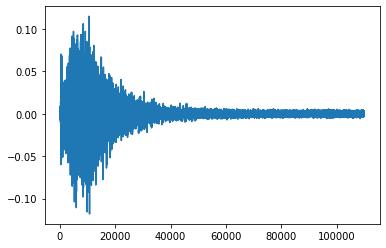

In [68]:
plt.plot(y_pred[10][1:])

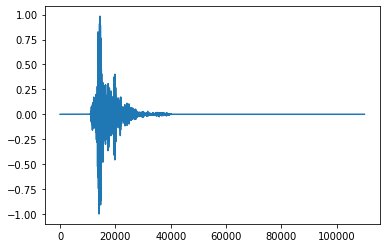

In [63]:
plt.plot(y_test1[10][1:])

In [594]:
y_test[10][0]

5.669336

# Draw diagram Plots

In [297]:
df4=pd.DataFrame(x_test)
df4.to_csv('x_test.csv')

In [298]:
df5=pd.DataFrame(y_test)
df5.to_csv('y_test.csv')

In [4]:
df4=pd.read_csv('x_test.csv')
df5=pd.read_csv('y_test.csv')

In [5]:
df4=df4.drop('Unnamed: 0',axis=1)
df5=df5.drop('Unnamed: 0',axis=1)

In [6]:
x_test=df4.values
y_test=df5.values

In [7]:
x_test

array([[5.1000e+00, 9.1000e+00, 1.1990e+02, 2.0000e+00, 2.9634e+04],
       [5.5000e+00, 7.2000e+00, 1.0210e+02, 2.0000e+00, 2.8000e+04],
       [4.0000e+00, 8.3000e+00, 4.6900e+01, 2.0000e+00, 2.1978e+04],
       ...,
       [4.9000e+00, 8.9000e+00, 2.8600e+01, 2.0000e+00, 3.0750e+03],
       [4.5000e+00, 7.3000e+00, 1.8880e+02, 2.0000e+00, 2.0003e+04],
       [4.3000e+00, 9.1000e+00, 1.3090e+02, 1.0000e+00, 2.7077e+04]])

In [39]:
i=2
time=np.arange(0,x_test[i][4]-1)*0.005
k=(y_test[i][1:int(x_test[i][4])])
k *= 10**y_test[i][0]

# Originals

In [68]:
i=100
time=np.arange(0,x_test[i][4]-1)*0.005
k=(y_test[i][1:int(x_test[i][4])])
k *= 10**y_test[i][0]

Text(0, 0.5, 'Acceleration (cm/s^2)')

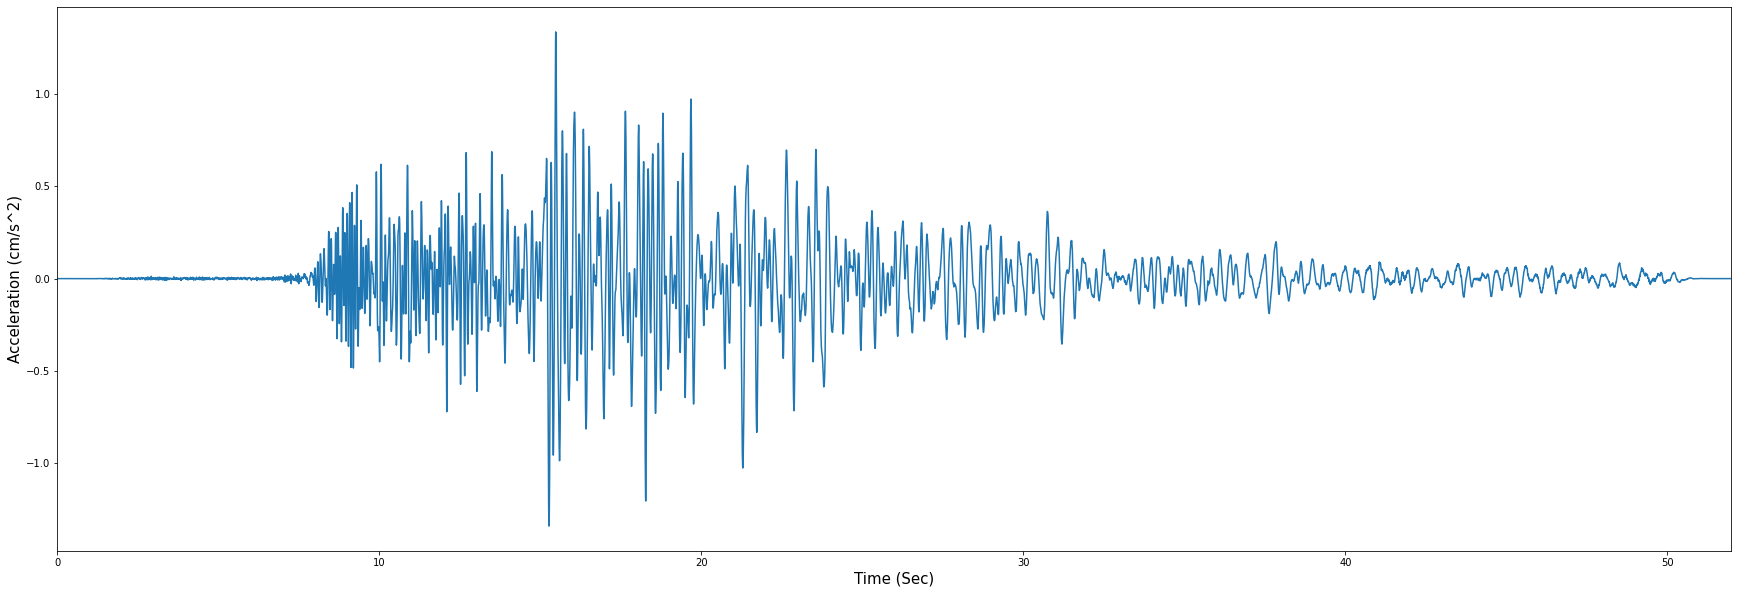

In [69]:
plt.figure(figsize=(30,10))
plt.plot(time,k)

plt.xlim(0,time[-1])
plt.xlabel('Time (Sec)',size=15)
plt.ylabel('Acceleration (cm/s^2)',size=15)

# Synthesized

In [70]:
y_pred=generator.predict(x_test_sc)

8/8 [==============================] - 0s 6ms/step


In [71]:
len(y_pred[0])

109999

In [72]:
time1=np.arange(0,x_test[i][4]-1)*0.005
k1=y_pred[i][1:(int(x_test[i][4]))]
k1 *=y_pred[i][0]

In [73]:
k1.max()

0.9061397

Text(0, 0.5, 'Acceleration (cm/s^2)')

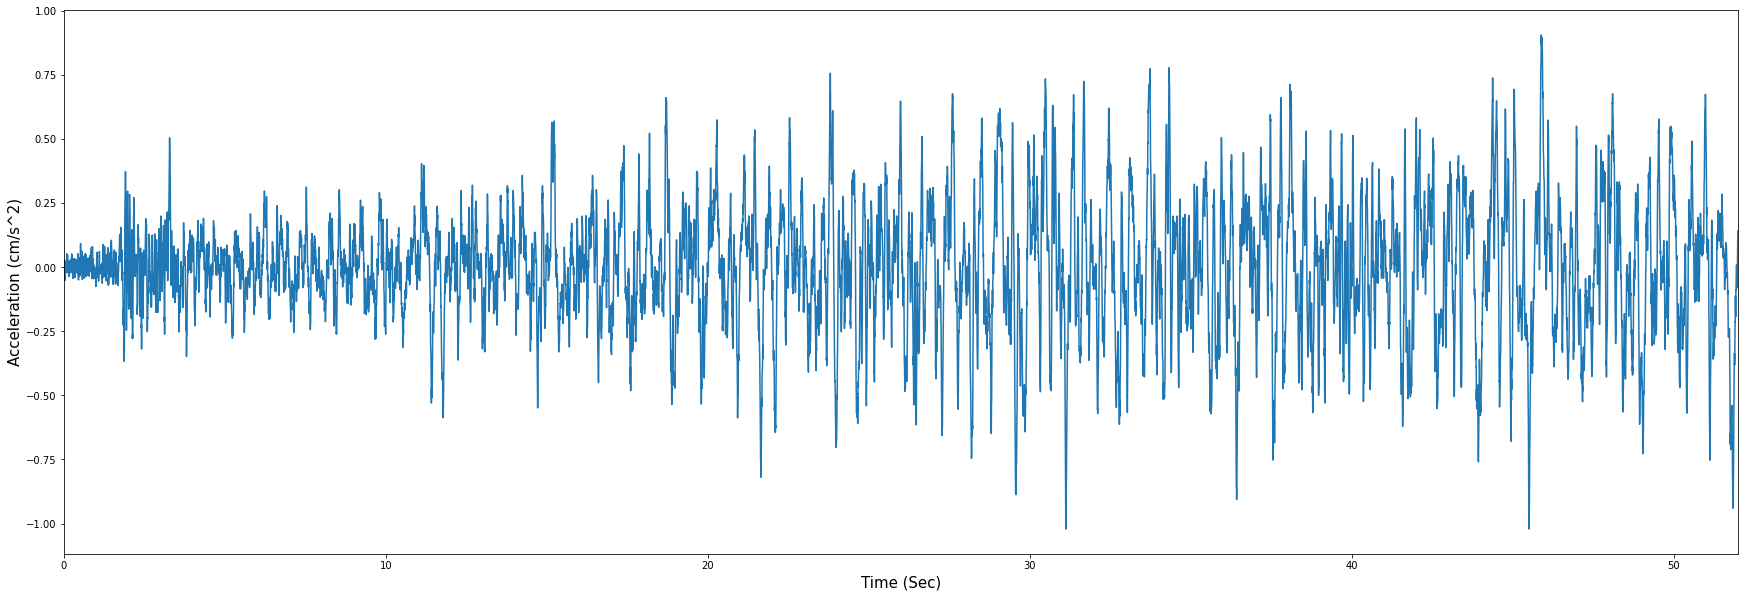

In [74]:
plt.figure(figsize=(30,10))
plt.plot(time1,k1)
plt.xlim(0,time1[-1])
plt.xlabel('Time (Sec)',size=15)
plt.ylabel('Acceleration (cm/s^2)',size=15)

#  Three Components of Accelerations


In [20]:
HNZ_ACC   ="E:\\second review\\ACC\\HNZ\\"
HNN_ACC   ="E:\\second review\\ACC\\HNN\\"
HNE_ACC   ="E:\\second review\\ACC\\HNE\\"

In [21]:
file1=os.listdir(HNN_ACC)
file2= os.listdir(HNZ_ACC)
file3=os.listdir(HNE_ACC)

In [22]:
(len(file2))

24612

In [23]:
file2[1001]

'BS.DOBAM..HNZ.D.EMSC-20161227_0000104.ACC.MP.ASC'

In [24]:
file3[1000]

'BS.DOBAM..HNE.D.EMSC-20161227_0000104.ACC.MP.ASC'

In [25]:
df=pd.read_table(HNN_ACC+file1[1000])
df1=pd.read_table(HNZ_ACC+file2[1001])
df2=pd.read_table(HNE_ACC+file3[1000])
time=np.arange(0,60224)*0.005
df.iloc[:59]

,EVENT_NAME: ROMANIA
0,EVENT_ID: EMSC-20161227_0000104
1,EVENT_DATE_YYYYMMDD: 20161227
2,EVENT_TIME_HHMMSS: 232056
3,EVENT_LATITUDE_DEGREE: 45.7538
4,EVENT_LONGITUDE_DEGREE: 26.4987
5,EVENT_DEPTH_KM: 100.4
6,HYPOCENTER_REFERENCE: ISC-webservice
7,MAGNITUDE_W: 5.6
8,MAGNITUDE_W_REFERENCE: Pondrelli_et_al_2002_da...
9,MAGNITUDE_L:


In [26]:
pga=df.iloc[38][0].split()[-1]
pga1=df1.iloc[38][0].split()[-1]
pga2=df2.iloc[38][0].split()[-1]

In [27]:
k1=df.iloc[63:].values.astype(float).flatten()
k2=df1.iloc[63:].values.astype(float).flatten()
k3=df2.iloc[63:].values.astype(float).flatten()

In [28]:
pga

'4.280608'

<Figure size 2160x720 with 0 Axes>

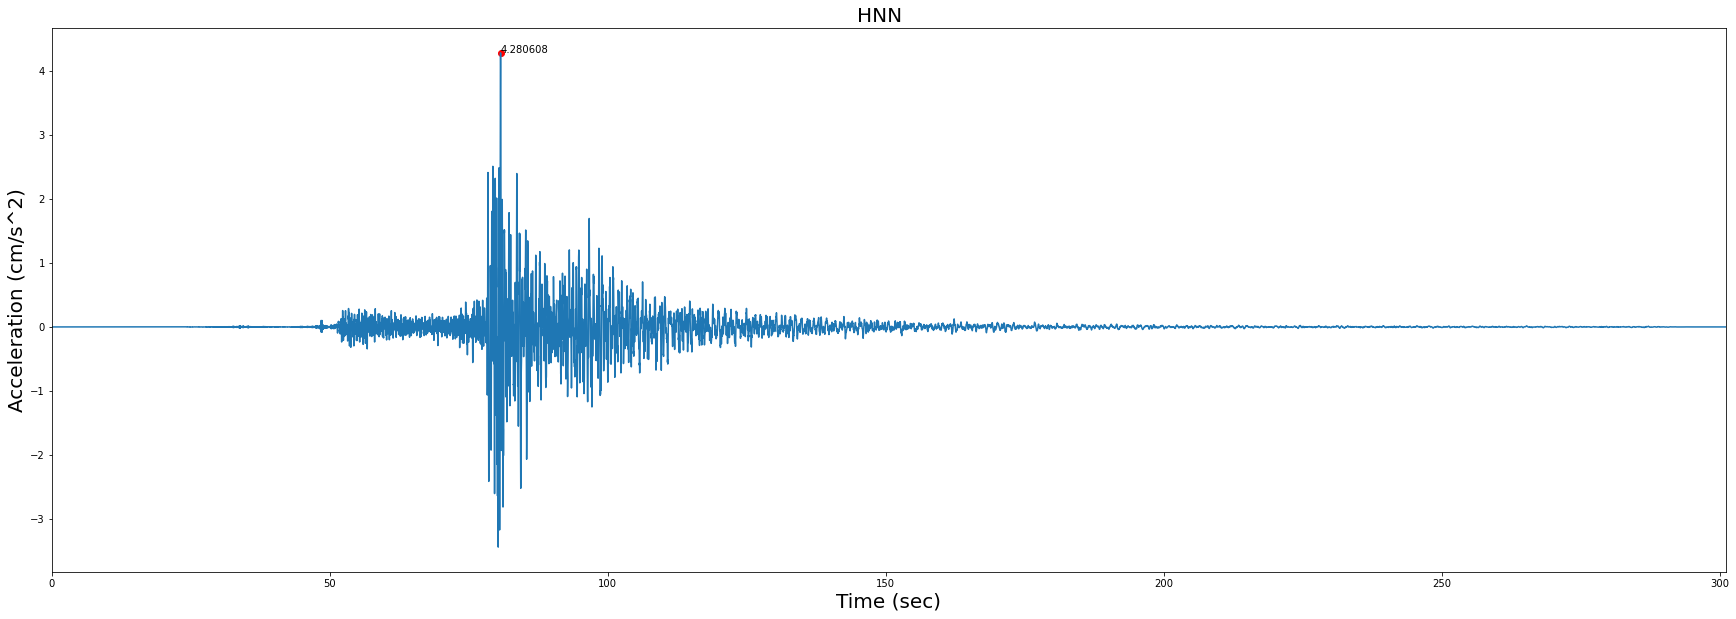

<Figure size 432x288 with 0 Axes>

In [29]:
fig1=plt.figure(figsize=(30,10))
fig1,maxi=plt.subplots(figsize=(30,10))
maxi.scatter(abs(k1).argmax()*0.005,abs(k1.max()),color='red')
maxi.annotate(pga, (abs(k1).argmax()*0.0005,abs(k1.max())),size=10)
maxi.plot(time,k1)
plt.xlim(0,time[-1])
plt.xlabel('Time (sec)',size=20)
plt.ylabel('Acceleration (cm/s^2)',size=20)
plt.title('HNN   ',size=20)
plt.show()
plt.savefig("figure4.png", dpi=300)

<Figure size 2160x720 with 0 Axes>

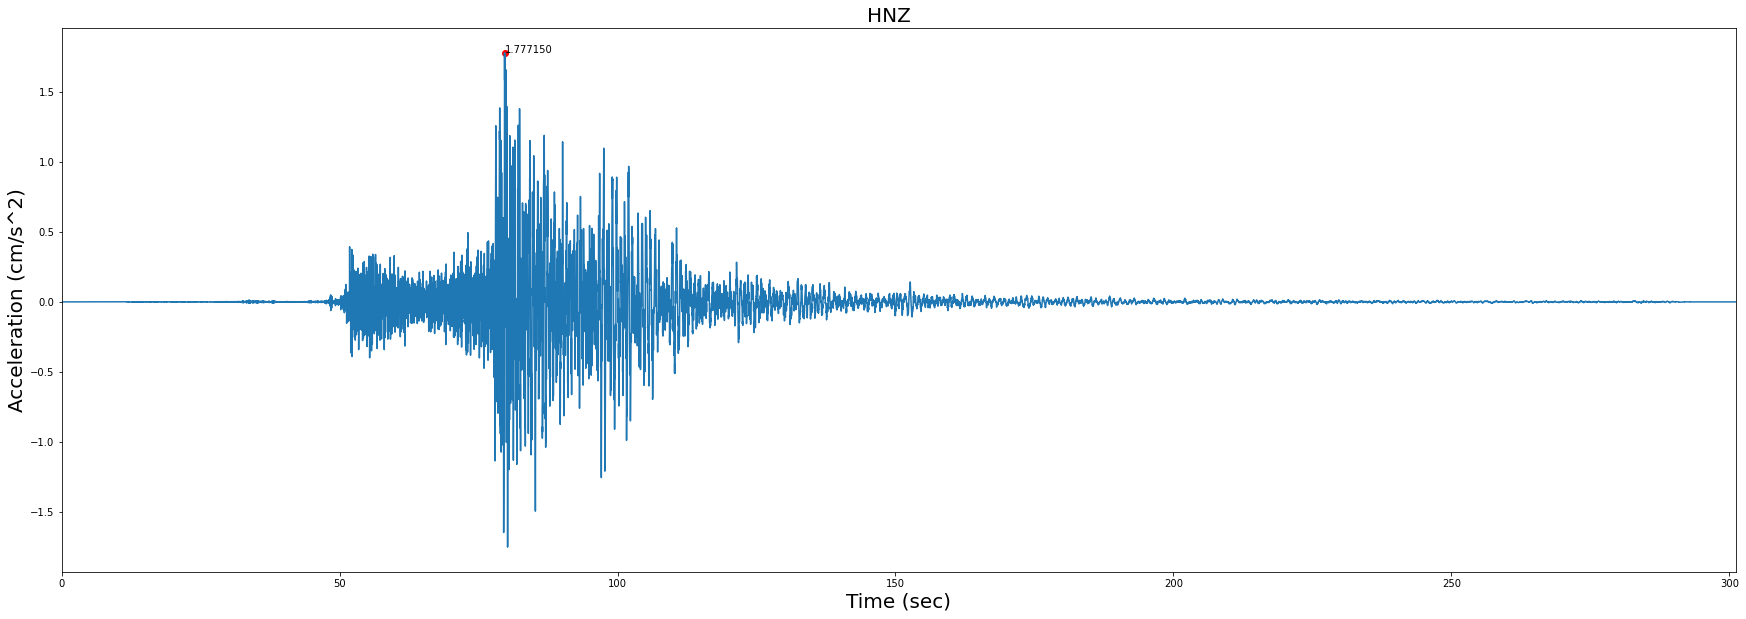

<Figure size 432x288 with 0 Axes>

In [35]:
fig2=plt.figure(figsize=(30,10))
fig2,maxi=plt.subplots(figsize=(30,10))
maxi.scatter(abs(k2).argmax()*0.005,abs(k2.max()),color='red')
maxi.annotate(pga1, (abs(k2).argmax()*0.005,abs(k2.max())),size=10)
maxi.plot(time,k2)
plt.xlim(0,time[-1])
plt.xlabel('Time (sec)',size=20)
plt.ylabel('Acceleration (cm/s^2)',size=20)
plt.title('HNZ   ',size=20)
plt.show()
plt.savefig("figure5.png", dpi=300)

<Figure size 2160x720 with 0 Axes>

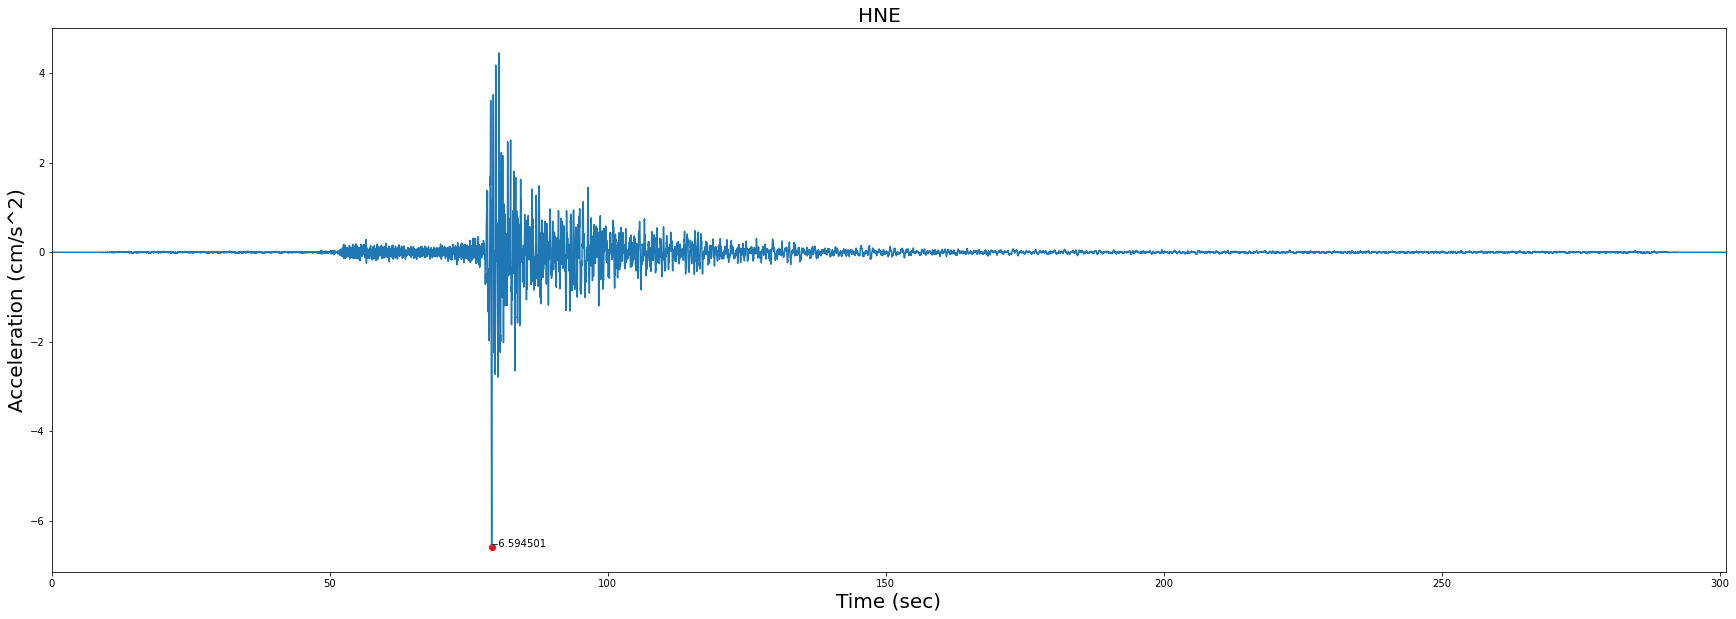

<Figure size 432x288 with 0 Axes>

In [34]:
fig3=plt.figure(figsize=(30,10))
fig3,maxi=plt.subplots(figsize=(30,10))
maxi.scatter(k3.argmin()*0.005,k3.min(),color='red')
maxi.annotate('-'+pga2, (k3.argmin()*0.005,k3.min()),size=10)
maxi.plot(time,k3)
plt.xlim(0,time[-1])
plt.xlabel('Time (sec)',size=20)
plt.ylabel('Acceleration (cm/s^2)',size=20)
plt.title('HNE   ',size=20)
plt.show()
plt.savefig("figure6.png", dpi=300)

In [32]:
df.keys()[0]

'EVENT_NAME: ROMANIA'

In [553]:
df.iloc[7]

EVENT_NAME: ROMANIA    MAGNITUDE_W: 5.6
Name: 7, dtype: object